<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_2d.csv to data_2d.csv
Saving mnist.csv to mnist.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
df_data_2d = pd.read_csv('data_2d.csv', header=None)
df_mnist = pd.read_csv('mnist.csv', header=None)

In [ ]:
df_data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


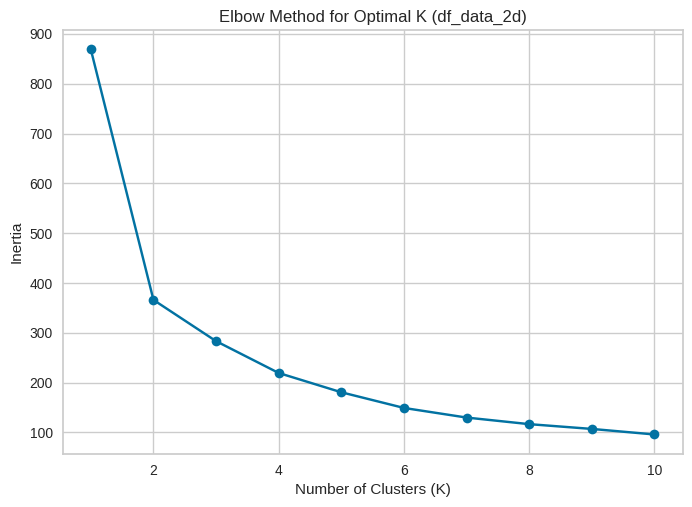

In [ ]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(df_data_2d)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K (df_data_2d)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

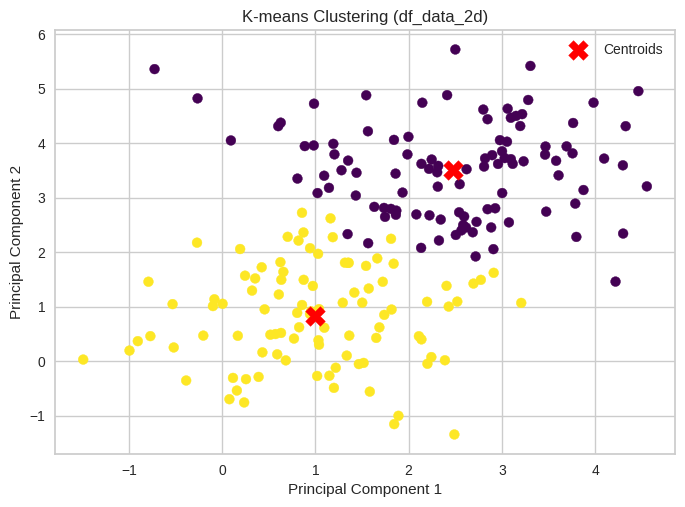

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans.fit(df_data_2d)

df_data_2d['cluster'] = kmeans.labels_

plt.scatter(df_data_2d.iloc[:, 1], df_data_2d.iloc[:, 2], c=df_data_2d['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (df_data_2d)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
df_data_2d

,0,1,2,cluster
0,0.0,-0.768716,0.460860,1
1,0.0,2.687848,2.366961,0
2,0.0,-0.201379,0.470430,1
3,0.0,0.608496,1.225400,1
4,0.0,-0.082282,1.137218,1
...,...,...,...,...
195,1.0,0.629144,4.378584,0
196,1.0,-0.723824,5.361801,0
197,1.0,1.346107,2.333476,0
198,1.0,3.608219,3.411546,0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


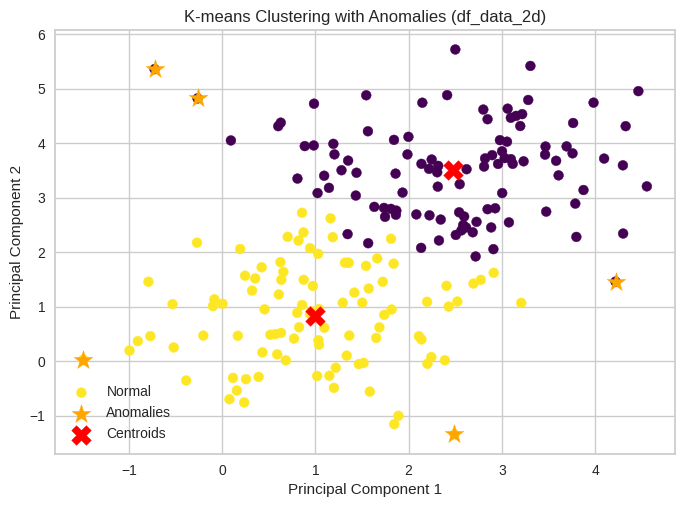

In [ ]:
df_data_2d.columns = df_data_2d.columns.astype(str)
df_data_2d_no_cluster = df_data_2d.drop('cluster', axis=1)
df_data_2d['distance_to_centroid'] = kmeans.transform(df_data_2d_no_cluster).min(axis=1)

threshold = 2.5

anomalies = df_data_2d[df_data_2d['distance_to_centroid'] > threshold]

plt.scatter(df_data_2d.iloc[:, 1], df_data_2d.iloc[:, 2], c=df_data_2d['cluster'], cmap='viridis', s=50, label='Normal')
plt.scatter(anomalies.iloc[:, 1], anomalies.iloc[:, 2], c='orange', marker='*', s=200, label='Anomalies')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Anomalies (df_data_2d)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


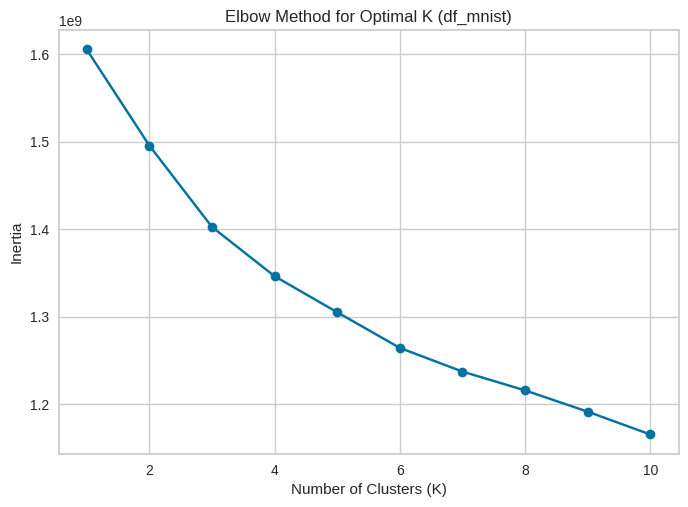

In [ ]:
inertia_mnist = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(df_mnist)
    inertia_mnist.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for Optimal K (df_mnist)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Видно по графіку що нема чіткого перелому, тому потрібно зробити зменшення розмірності

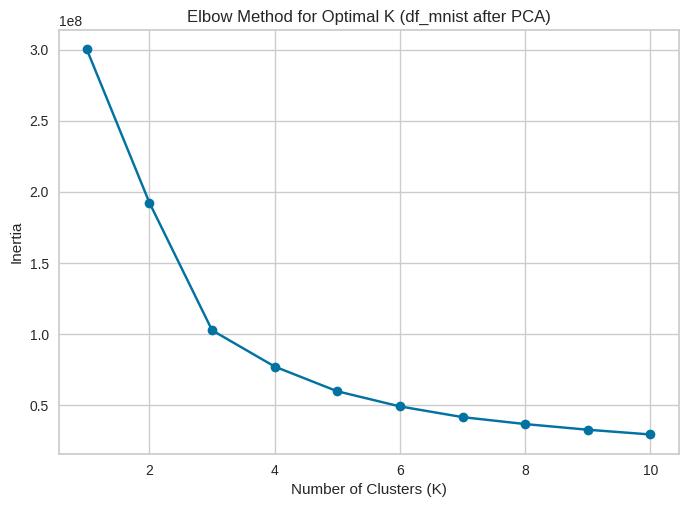

In [ ]:
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(df_mnist.iloc[:, 1:])

inertia_mnist_pca = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(X_mnist_pca)
    inertia_mnist_pca.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia_mnist_pca, marker='o')
plt.title('Elbow Method for Optimal K (df_mnist after PCA)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Тепер чітко видно що оптимальна кількість кластерів 3

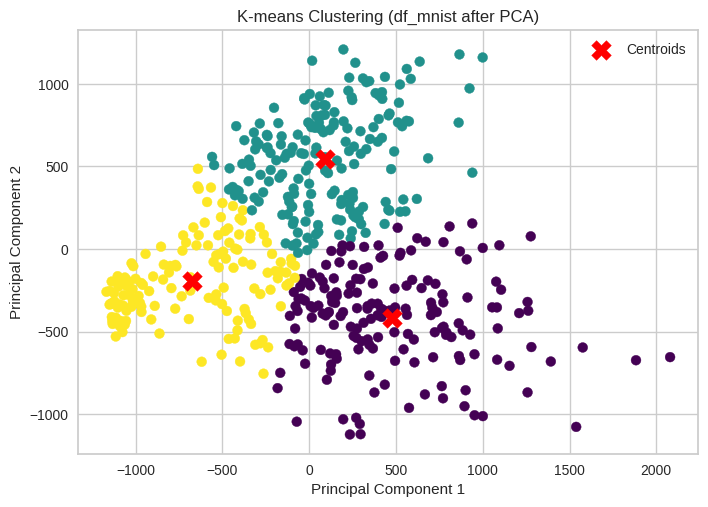

In [ ]:
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0)
kmeans_optimal.fit(X_mnist_pca)

df_mnist['cluster'] = kmeans_optimal.labels_

plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=df_mnist['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (df_mnist after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,cluster,distance_to_centroid
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,386.824086
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,831.426806
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,331.097442
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,582.309399
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,348.736472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,653.188534
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,264.801273
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,503.683094
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,382.439368


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


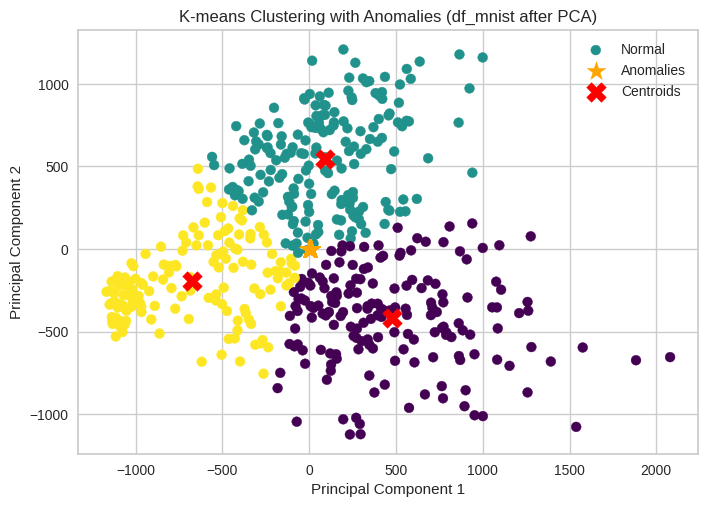

In [ ]:
df_mnist.columns = df_mnist.columns.astype(str)
df_mnist_no_cluster = df_mnist.drop('cluster', axis=1)

# Transform only the relevant features (principal components)
X_mnist_pca_transformed = pca.transform(df_mnist_no_cluster.iloc[:, 1:])

# Calculate distances from each data point to its cluster centroid
df_mnist['distance_to_centroid'] = kmeans_optimal.transform(X_mnist_pca_transformed).min(axis=1)

# Set a threshold for anomaly detection (adjust as needed)
threshold = 500

# Identify anomalies
anomalies_ = df_mnist[df_mnist['distance_to_centroid'] > threshold]

# Plot the data with anomalies highlighted
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=df_mnist['cluster'], cmap='viridis', s=50, label='Normal')
plt.scatter(anomalies_.iloc[:, 0], anomalies_.iloc[:, 1], c='orange', marker='*', s=200, label='Anomalies')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Anomalies (df_mnist after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
anomalies

,0,1,2,3,4,5,6,7,8,9,...,777,778,779,780,781,782,783,784,cluster,distance_to_centroid
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,831.426806
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,582.309399
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,755.784132
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,609.325072
23,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,600.376355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527.601739
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,564.104769
493,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550.435834
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,653.188534
